# Credit Card Churn - Data Visualisation

### Data Preparation

In [1]:
import os
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
working_directory = os.getcwd()

In [3]:
path = working_directory + '/data/BankChurners.csv'

In [4]:
bank_churn = pd.read_csv(path)

In [5]:
bank_churn.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [6]:
bank_churn.shape

(10127, 23)

In [7]:
bank_churn.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [8]:
#dropping irrelevant columns
bank_churn1 = bank_churn.drop(['CLIENTNUM', 'Gender', 'Marital_Status', 'Avg_Utilization_Ratio', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis = 1)

In [9]:
#modifying "Customer_Age" column 
bank_churn11 = bank_churn1[bank_churn1['Customer_Age'] < 70] #Customer_Age>70 - only 2 observations 

In [10]:
#creating "Age_Group" column 
bank_churn2 = bank_churn11.copy()

conditions = [
    (bank_churn2['Customer_Age'] >= 20) & (bank_churn2['Customer_Age'] < 30),
    (bank_churn2['Customer_Age'] >= 30) & (bank_churn2['Customer_Age'] < 40),
    (bank_churn2['Customer_Age'] >= 40) & (bank_churn2['Customer_Age'] < 50),
    (bank_churn2['Customer_Age'] >= 50) & (bank_churn2['Customer_Age'] < 60),
    (bank_churn2['Customer_Age'] >= 60) & (bank_churn2['Customer_Age'] < 70)
]

results = ['20-29', '30-39', '40-49', '50-59', '60-69']

bank_churn2['Age_group'] = np.select(conditions, results)

In [11]:
#selecting attrited customers
attrited = bank_churn2.loc[bank_churn1['Attrition_Flag'].isin(['Attrited Customer'])]

In [12]:
#selecting existing customers
existing = bank_churn2.loc[bank_churn1['Attrition_Flag'].isin(['Existing Customer'])]

### Visualizing differences between attrited and existing customers

Text(0, 0.5, 'Count')

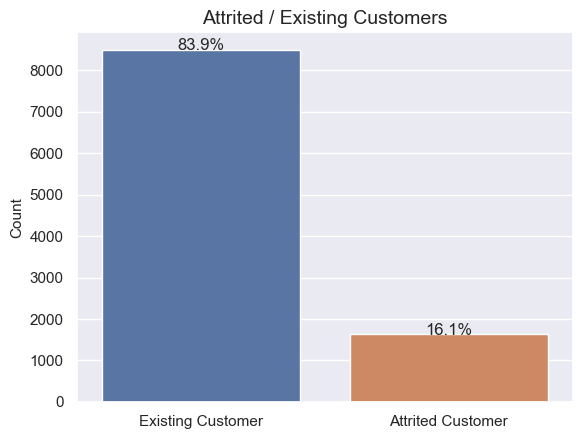

In [13]:
#attrited/existing customers countplot 

sns.set_theme(style='darkgrid')

ax = sns.countplot(data=bank_churn2, x="Attrition_Flag")
ax.set(xlabel='Attrition Flag', ylabel='Count')

#total count
total = float(len(bank_churn2))

#annotating bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., 
            height + 0.1, 
            '{:.1f}%'.format((height/total) * 100), 
            ha="center")
    
plt.title('Attrited / Existing Customers', fontsize = 14)
plt.xlabel('')
plt.ylabel('Count', fontsize = 11)

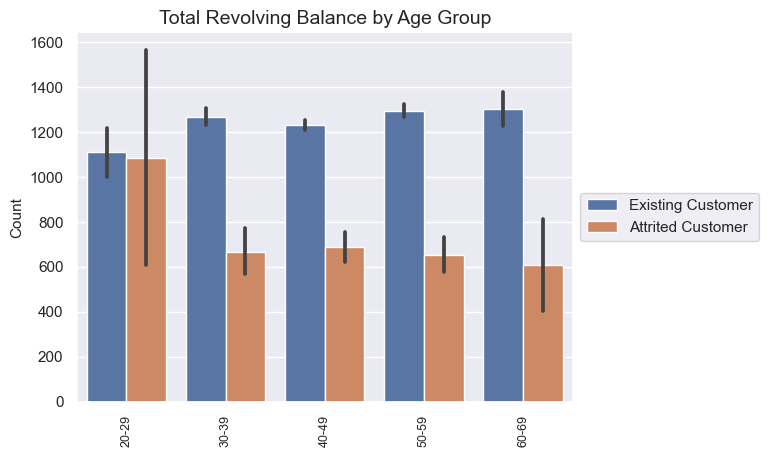

In [14]:
#association between total revolving balance and age group

# defining new order of values
new_order_age = ['20-29','30-39', '40-49', '50-59', '60-69']

# reordering Age_group column
bank_churn2['Age_group'] = pd.Categorical(bank_churn2['Age_group'], categories=new_order_age, ordered=True)

sns.barplot(bank_churn2, x="Age_group", y="Total_Revolving_Bal", hue="Attrition_Flag")
plt.title('Total Revolving Balance by Age Group', fontsize = 14)
plt.xlabel('')
plt.ylabel('Count', fontsize = 11)
plt.xticks(rotation=90, fontstyle='normal', fontsize = 9)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

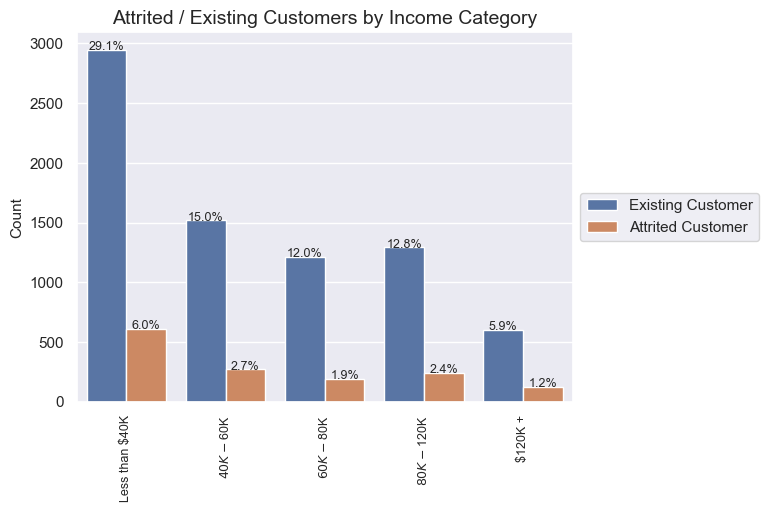

In [15]:
#visualizing attrited / existing customers by income category

# defining new order of values
new_order_income = ['Less than $40K','$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +']

# reordering Income_Category column
bank_churn2['Income_Category'] = pd.Categorical(bank_churn2['Income_Category'], categories=new_order_income, ordered=True)

ax = sns.countplot(data=bank_churn2, x="Income_Category", hue="Attrition_Flag")

#total count
total = float(len(bank_churn2))

#annotating bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., 
            height + 0.1, 
            '{:.1f}%'.format((height/total) * 100), 
            ha="center", fontsize=9)  # Adjust the fontsize here

plt.xticks(rotation=90, fontstyle='normal', fontsize=9)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Attrited / Existing Customers by Income Category', fontsize=14)
plt.xlabel('', fontsize=11)
plt.ylabel('Count', fontsize=11)

plt.show()

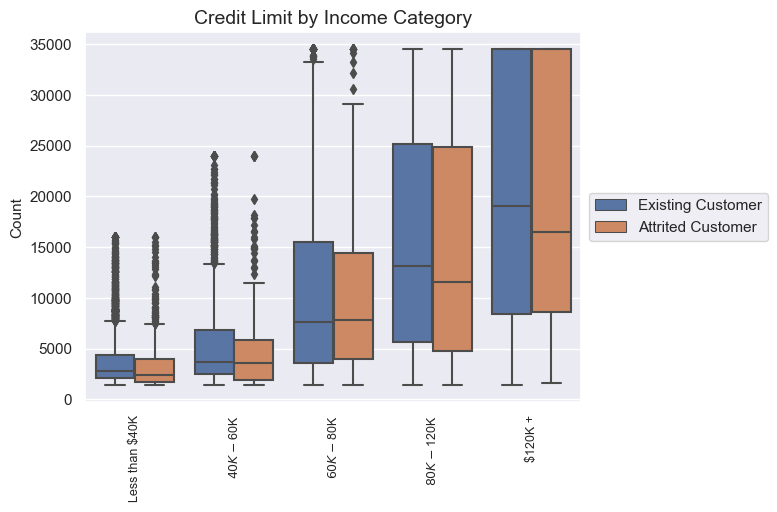

In [16]:
#association between credit limit and income category 

sns.boxplot(x="Income_Category", y="Credit_Limit", hue="Attrition_Flag", data=bank_churn2)
plt.title('Credit Limit by Income Category', fontsize = 14)
plt.xlabel('')
plt.ylabel('Count', fontsize = 11)
plt.xticks(rotation=90, fontstyle='normal', fontsize = 9)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

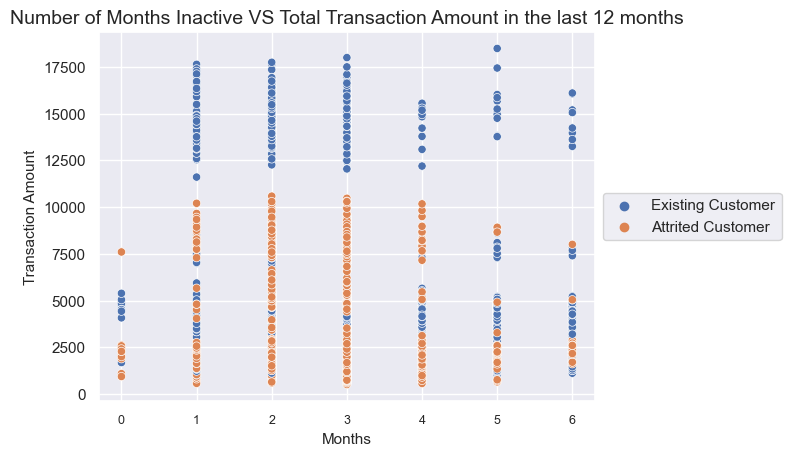

In [17]:
#association between number of months inactive VS transaction amount in the last 12 months

sns.scatterplot(data=bank_churn2, x="Months_Inactive_12_mon", y="Total_Trans_Amt", hue="Attrition_Flag")
plt.title('Number of Months Inactive VS Total Transaction Amount in the last 12 months', fontsize = 14)
plt.xlabel('Months', fontsize = 11)
plt.ylabel('Transaction Amount', fontsize = 11)
plt.xticks(fontstyle='normal', fontsize = 9)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

### Card category visualizations

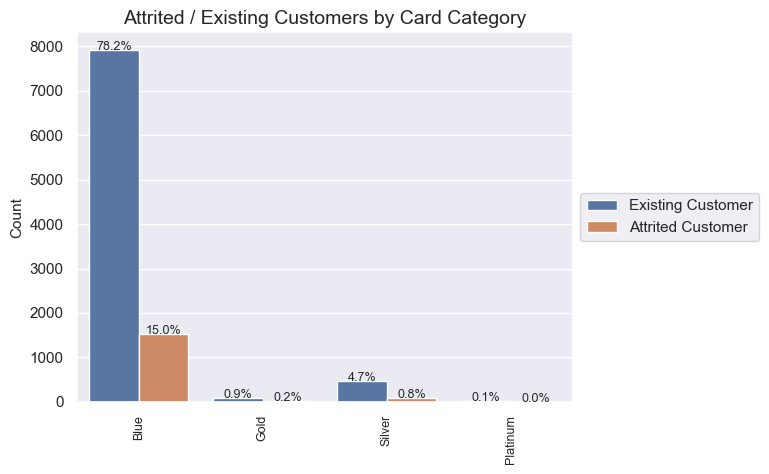

In [18]:
#visualizing attrited / existing customers by card category

ax = sns.countplot(data=bank_churn2, x="Card_Category", hue="Attrition_Flag")

#total count
total = float(len(bank_churn2))

#annotating bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., 
            height + 0.1, 
            '{:.1f}%'.format((height/total) * 100), 
            ha="center", fontsize=9)  # Adjust the fontsize here
    
plt.xticks(rotation=90, fontstyle='normal', fontsize=9)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Attrited / Existing Customers by Card Category', fontsize=14)
plt.xlabel('', fontsize=11)
plt.ylabel('Count', fontsize=11)

plt.show()

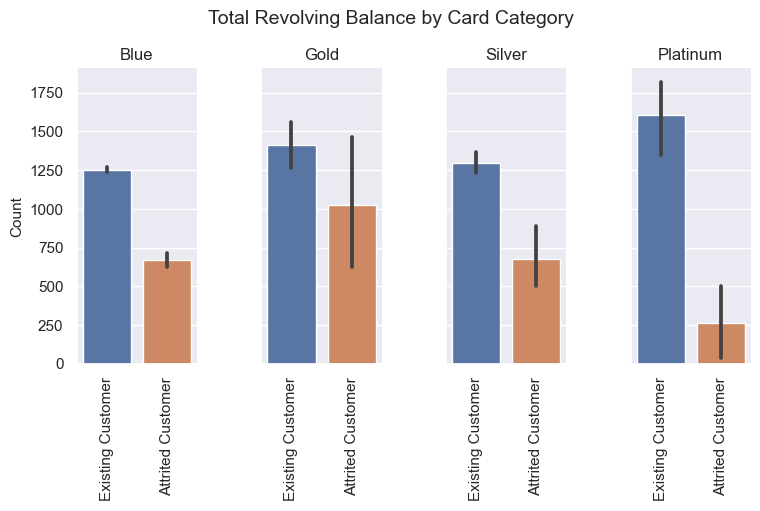

In [19]:
#visualizing total revolving balance by card category

catplot = sns.catplot(
    data=bank_churn2, kind="bar",
    x="Attrition_Flag", y="Total_Revolving_Bal", col="Card_Category",
    height=4, aspect=.5,
)

#plot properties

for ax in catplot.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    
for ax in catplot.axes.flat:
    ax.set_xlabel('')
    ax.set_ylabel('Count',fontsize=11)

catplot.set_titles("{col_name}")
catplot.fig.suptitle('Total Revolving Balance by Card Category', fontsize=14, y=1.05)

plt.show()

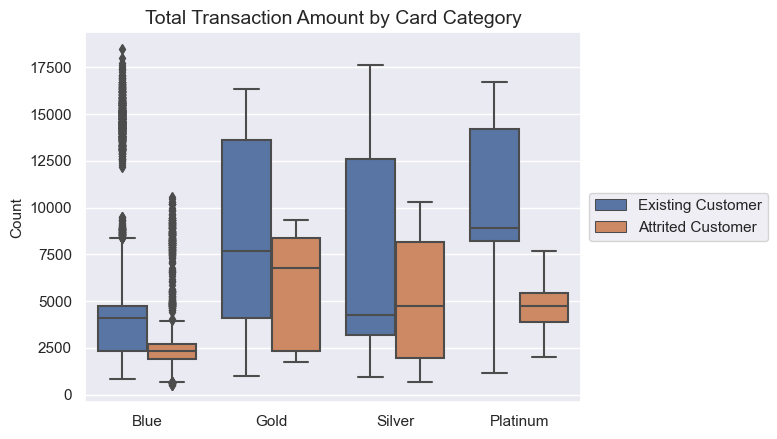

In [20]:
#visualizing total transaction amount by card category

boxplot = sns.boxplot(x="Card_Category", 
            y="Total_Trans_Amt",
            data=bank_churn2,
            hue="Attrition_Flag")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Total Transaction Amount by Card Category', fontsize=14)
plt.xlabel('', fontsize=11)
plt.ylabel('Count', fontsize=11)
plt.show()

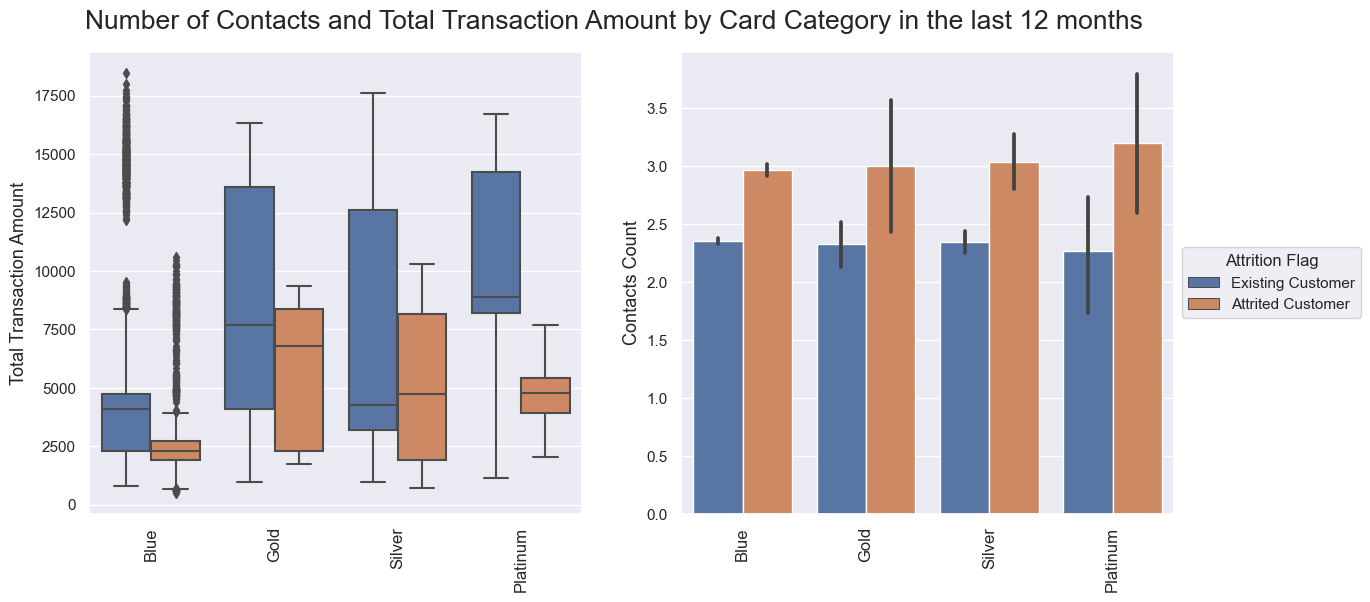

In [21]:
#visualizing number of contacts and total transaction amount by card category

plt.figure(figsize=(14, 6))

# first subplot: Boxplot for Total Transaction Amount by Card Category
plt.subplot(1, 2, 1)
boxplot2 = sns.boxplot(x="Card_Category", 
                       y="Total_Trans_Amt", 
                       data=bank_churn2, 
                       hue="Attrition_Flag")
plt.xlabel('')
plt.xticks(rotation=90, fontsize=12)
plt.ylabel('Total Transaction Amount', fontsize=13)
boxplot2.legend_.remove()  # Remove the legend from the first plot

# second subplot
plt.subplot(1, 2, 2)
barplot2 = sns.barplot(x="Card_Category", 
                       y="Contacts_Count_12_mon", 
                       data=bank_churn2, 
                       hue="Attrition_Flag")
plt.xlabel('')
plt.ylabel('Contacts Count', fontsize=13)
plt.xticks(rotation=90, fontsize=12)

#creating a single legend for both plots
handles, labels = boxplot2.get_legend_handles_labels()
plt.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5), title='Attrition Flag')

plt.suptitle('Number of Contacts and Total Transaction Amount by Card Category in the last 12 months', fontsize=19, y=0.95)

plt.show()

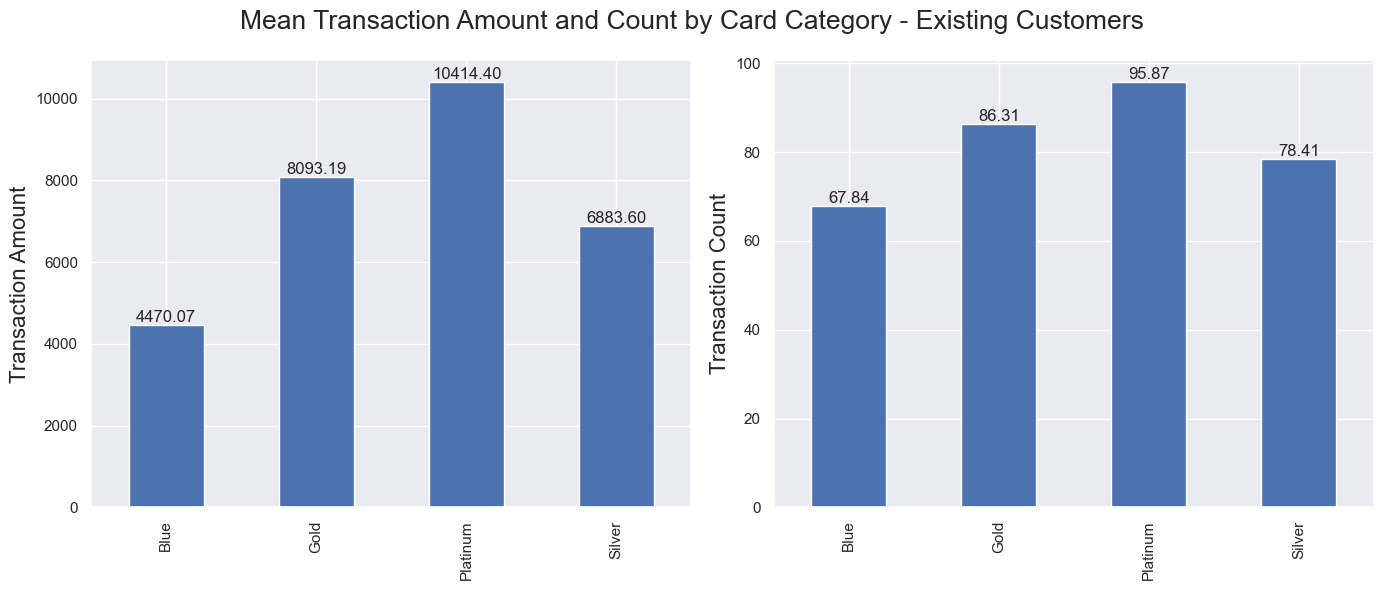

In [22]:
#visualizing mean transaction amount and mean transaction count by card category - existing customers

plt.figure(figsize=(14, 6))

#first subplot
plt.subplot(1, 2, 1) 
churn_bar1 = existing.groupby(['Card_Category']).agg({'Total_Trans_Amt': "mean"}).rename(columns={'Total_Trans_Amt': 'Mean Transaction Amount'})
mean_transaction_amount = churn_bar1["Mean Transaction Amount"]
churn_bar1["Mean Transaction Amount"].plot.bar()
plt.title('', fontsize=16)
plt.xlabel('')
plt.ylabel('Transaction Amount', fontsize=16)

#annotating bars
for i, value in enumerate(mean_transaction_amount):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')

#second subplot
plt.subplot(1, 2, 2) 
churn_bar2 = existing.groupby(['Card_Category']).agg({'Total_Trans_Ct': "mean"}).rename(columns={'Total_Trans_Ct': 'Mean Transaction Count'})
mean_transaction_count = churn_bar2["Mean Transaction Count"]
churn_bar2["Mean Transaction Count"].plot.bar()
plt.title('', fontsize=16)
plt.xlabel('')
plt.ylabel('Transaction Count', fontsize=16)

#annotating bars
for i, value in enumerate(mean_transaction_count):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')

plt.suptitle('Mean Transaction Amount and Count by Card Category - Existing Customers', fontsize=19) 
plt.tight_layout()  
plt.show()

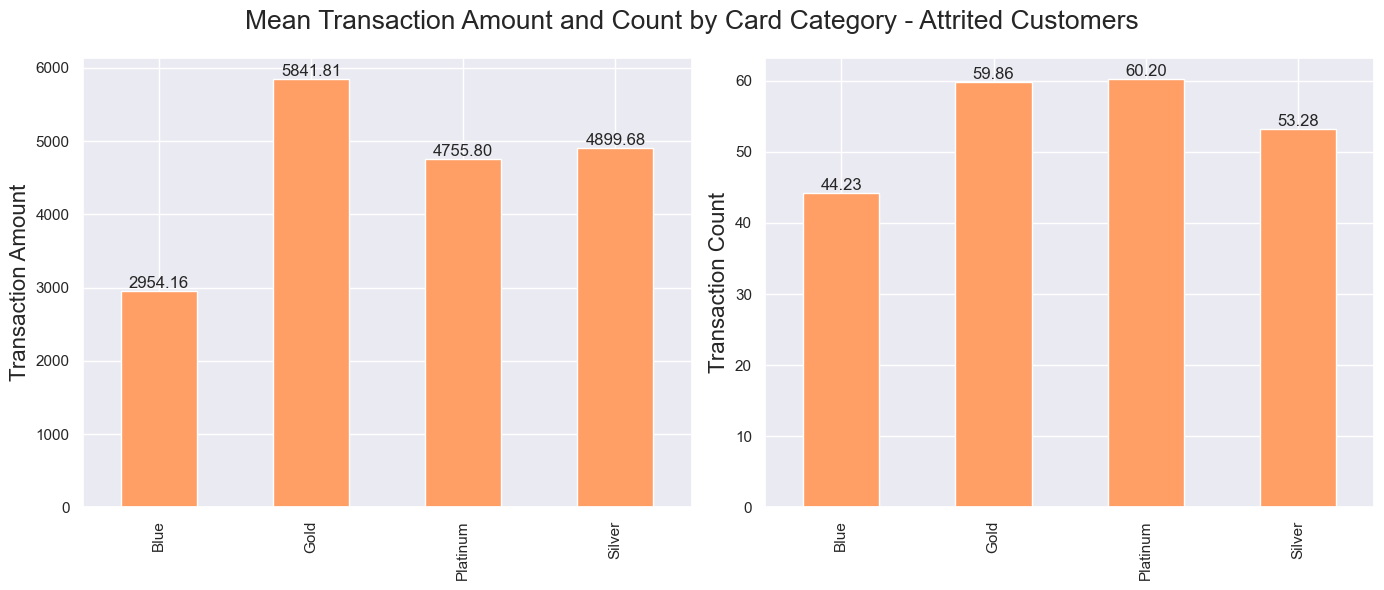

In [23]:
#visualizing mean transaction amount and mean transaction count by card category - attrited customers

plt.figure(figsize=(14, 6))

#first subplot
plt.subplot(1, 2, 1) 
churn_bar1 = attrited.groupby(['Card_Category']).agg({'Total_Trans_Amt': "mean"}).rename(columns={'Total_Trans_Amt': 'Mean Transaction Amount'})
mean_transaction_amount = churn_bar1["Mean Transaction Amount"]
churn_bar1["Mean Transaction Amount"].plot.bar(color='#FF9F66')
plt.title('', fontsize=16)
plt.xlabel('')
plt.ylabel('Transaction Amount', fontsize=16)

#annotate bars
for i, value in enumerate(mean_transaction_amount):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')

#second subplot
plt.subplot(1, 2, 2) 
churn_bar2 = attrited.groupby(['Card_Category']).agg({'Total_Trans_Ct': "mean"}).rename(columns={'Total_Trans_Ct': 'Mean Transaction Count'})
mean_transaction_count = churn_bar2["Mean Transaction Count"]
churn_bar2["Mean Transaction Count"].plot.bar(color='#FF9F66')
plt.title('', fontsize=16)
plt.xlabel('')
plt.ylabel('Transaction Count', fontsize=16)

#annotating bars
for i, value in enumerate(mean_transaction_count):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')

plt.suptitle('Mean Transaction Amount and Count by Card Category - Attrited Customers', fontsize=19) 
plt.tight_layout()  
plt.show()